## Visualize Arizona Cases Over Time By County

data source:
https://github.com/nytimes/covid-19-data

In [1]:
import numpy as np
from scipy import stats

import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('bmh')
# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('fivethirtyeight')

In [2]:
# import data
# url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', index_col='date')
counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col='date')

### AZ County Analysis

In [3]:
# examine counties for the entire country
counties.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
counties.shape

(67456, 5)

In [5]:
# how many data points relate to AZ counties?
counties.loc[(counties.state == 'Arizona')].shape

(505, 5)

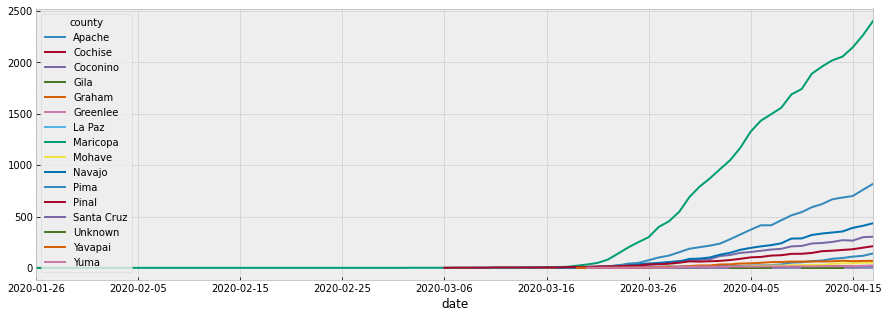

In [28]:
# rather than using Seaborn to color different counties
# I can use pivot within pandas plot() to align counties as columns
# to get the same effect natively in pandas plot()

counties.loc[counties.state == 'Arizona'].pivot(
    columns='county',
    values='cases').plot(figsize=(15, 5));

In [16]:
# identify top 5 counties by case count
counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index

Index(['Pinal', 'Coconino', 'Navajo', 'Pima', 'Maricopa'], dtype='object', name='county')

In [17]:
# identify all counties that are not within the top 5 by count of cases
# and lump them together

non_top = counties.loc[(counties.state == 'Arizona') &
            ~ (counties.county.isin(counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index))].groupby(counties.loc[(counties.state == 'Arizona') &
            ~ (counties.county.isin(counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index))].index).sum()

non_top['county'] = 'Other'

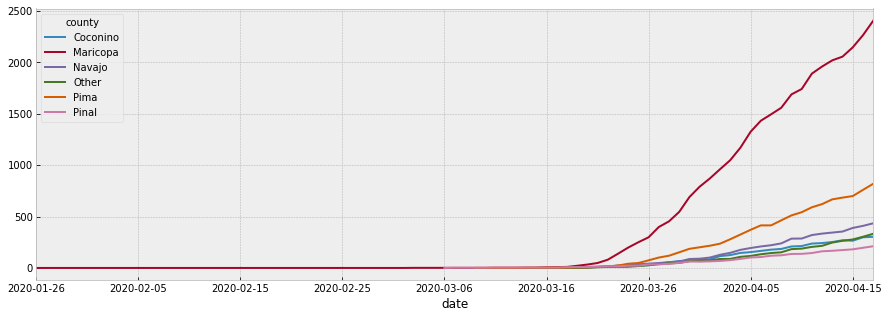

In [27]:
# plot top 5 counties plus other counties combined

pd.concat([
    counties.loc[(counties.state == 'Arizona') &
            (counties.county.isin(counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index))].drop('state', axis=1),
    non_top
],sort=False).pivot(
    columns='county',
    values='cases').plot(figsize=(15, 5));

### Prior 2 weeks of data

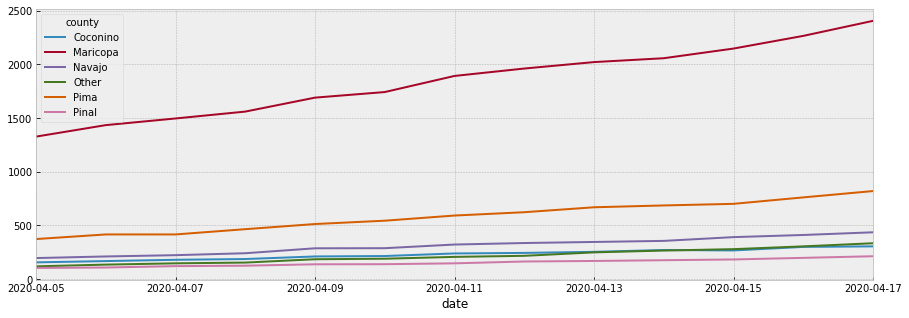

In [20]:
# display data for only the past two weeks

pd.concat([
    counties.loc[(counties.state == 'Arizona') &
            (counties.county.isin(counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index))].drop('state', axis=1),
    non_top
],sort=False)[pd.concat([
    counties.loc[(counties.state == 'Arizona') &
            (counties.county.isin(counties.loc[counties.state == 'Arizona'] \
    .groupby('county')['cases'] \
    .sum() \
    .sort_values() \
    .tail() \
    .index))].drop('state', axis=1),
    non_top
],sort=False).index > (datetime.datetime.now() + pd.offsets.DateOffset(-14)).strftime("%Y-%m-%d")].pivot(
    columns='county',
    values='cases').plot(figsize=(15, 5));

### State Level Analysis

In [21]:
states.shape

(2553, 4)

In [22]:
states.dtypes

state     object
fips       int64
cases      int64
deaths     int64
dtype: object

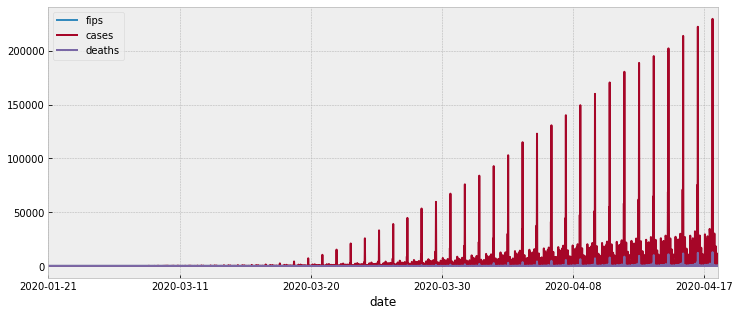

In [23]:
states.plot(figsize=(12, 5));

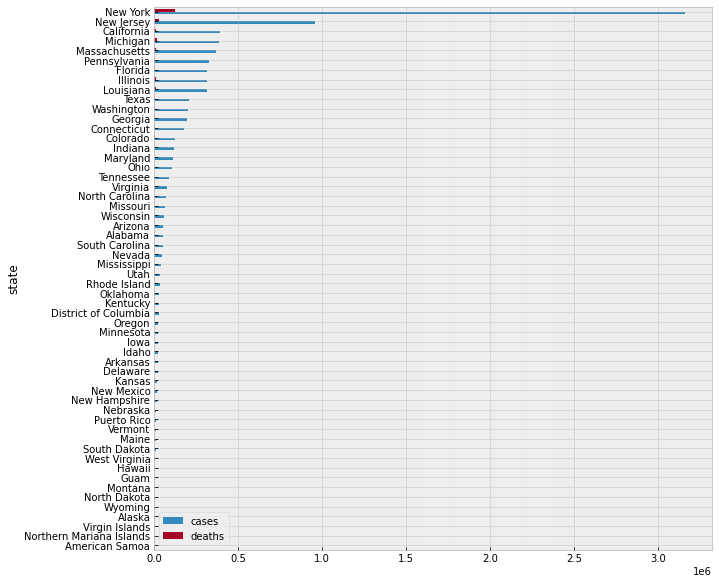

In [24]:
states.groupby('state')[['cases', 'deaths']] \
    .sum() \
    .sort_values(by='cases') \
    .plot(kind='barh', figsize=(10,10));

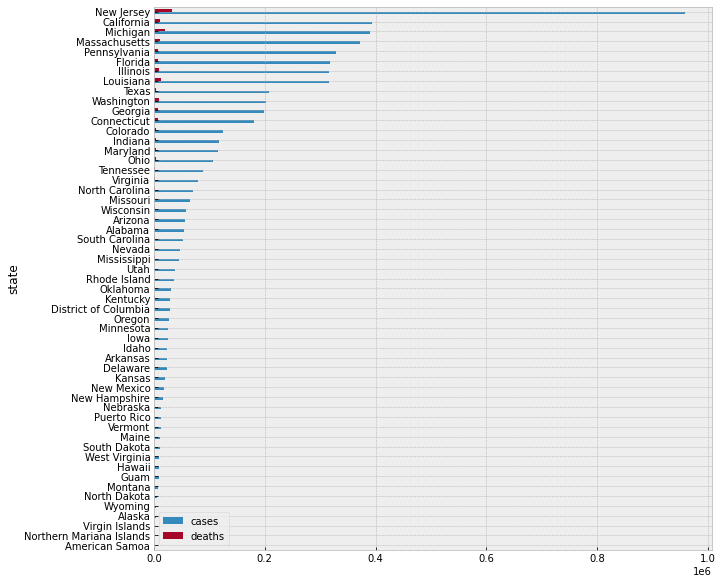

In [25]:
# exclude NY
states[states.state != 'New York'].groupby('state')[['cases', 'deaths']] \
    .sum() \
    .sort_values(by='cases') \
    .plot(kind='barh', figsize=(10,10));

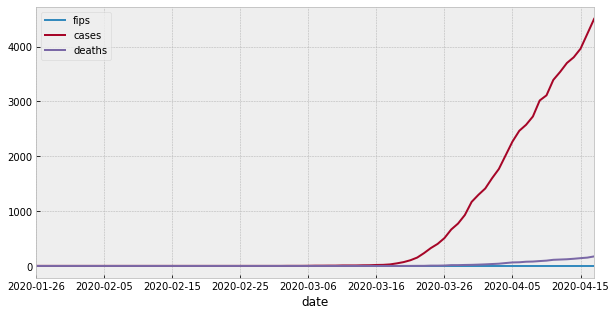

In [26]:
# Arizona cases
states[states.state == 'Arizona'].plot(figsize=(10, 5));